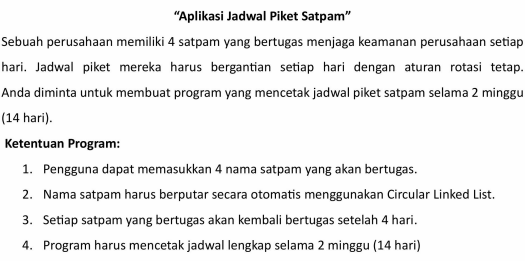

In [ ]:
# Class
class Node:
  def __init__(self, data):
    self.data = data
    self.next_node = None

class CircularLinkedList:
  def __init__(self):
    self.head = None

  # Fungsi iterator untuk linked list
  def  __iter__ (self):
    node = self.head

    while node is not None:
      yield node
      node = node.next_node

  def at(self, index):
    current_index = 0

    for v in self:
      if current_index == index:
        return v.data
      current_index = current_index + 1
      if v.next_node == self.head:
        break

    return None

  def length(self):
    # Linked list kosong, langsung return 0
    if self.head == None:
      return 0

    length = 0

    for v in self:
      length = length + 1
      if v.next_node == self.head:
        break

    return length

  def display(self):
    elements = []

    for v in self:
      elements.append(v.data)
      if v.next_node == self.head:
        break

    print(" -> ".join(elements))

  def find_node(self, target):
    for v in self:
      if v.data == target:
        return v
      if v.next_node == self.head:
        break

    return None

  def insert(self, new_data, add_index = None):
    # Linked list kosong, buat node baru sebagai head
    if not self.head:
      self.head = Node(new_data)
      return

    if isinstance(add_index, int): # Sisipkan elemen pada add_index
      current_index = 0
      previous_node = None
      for v in self:
        if current_index == add_index:
          new_node = Node(new_data)
          if v == self.head: # Sisipkan elemen di awal
            self.head = new_node
            new_node.next_node = v
          else:
            new_node.next_node = v
            previous_node.next_node = new_node
          break
        current_index = current_index + 1
        previous_node = v
        if v.next_node == self.head:
          break
    else: # Tambahkan elemen di akhir
      last_element = self.head
      new_node = Node(new_data)
      for v in self:
        last_element = v
        if v.next_node == self.head:
          break
      last_element.next_node = new_node
      new_node.next_node = self.head

  def pop(self, pop_index = None):
    current_index = 0
    previous_node = None

    for v in self:
      # Jika pop_index adalah integer, hapus elemen pada pop_index
      # Jika pop_index adalah None, hapus elemen terakhir
      if (isinstance(pop_index, int) and current_index == pop_index) or (pop_index == None and v.next_node == None):
        if v == self.head:
          self.head = v.next_node
        else:
          previous_node.next_node = v.next_node
        break
      current_index = current_index + 1
      previous_node = v
      if v.next_node == self.head:
        break


names_input = input("Masukkan nama satpam dengan format:\n<Nama1>, <Nama2>, <Nama3>, <Nama4>, ....\n\n")
days_input = int(input("Cetak jadwal selama berapa hari: "))

counter = 0
guards = CircularLinkedList()

print("")

for name in names_input.split(", "):
  guards.insert(name)

for v in guards:
  counter = counter + 1
  if counter > days_input:
    break
  print(f"Hari ke-{counter}:\t{v.data}")